In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import torch
import numpy as np
from utils import label2one_hot
from generate_data import generate_data, generate_grid_data
from modules import Dropout
from modules import Linear, Sequential
from modules.losses import LossCrossEntropy, LossMSE
from optimizers import SGD
from modules.activations import ReLU

In [2]:
def plot_data(points, labels=0, minn=0, maxx=1, radius=1/np.sqrt(2*np.pi), center=np.array([0.5, 0.5])):
    circle = plt.Circle(center, radius, color='r', fill=False, linewidth=5)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.add_patch(circle)
    if torch.is_tensor(points):
        points = points.numpy()
    
    print("points: {} -- points: {}".format(type(points), points.shape))
    ax.scatter(points[:,0], points[:,1], c=labels)
    ax.set_xlim(minn, maxx)
    ax.set_ylim(minn, maxx)

In [3]:
def default_net_1(x_all, y_all, num_of_neurons=(2, 25, 25, 25, 2), lr=0.1, momentum_coef=0.0, num_of_epochs=100):
    ce = LossCrossEntropy()

    model = Sequential()
    model.add(Linear(out=num_of_neurons[1], input_size=num_of_neurons[0], activation='relu'))
    model.add(Linear(out=num_of_neurons[2], activation='relu'))
    model.add(Linear(out=num_of_neurons[2], activation='relu'))
    model.add(Dropout(prob=0.2))
    model.add(Linear(out=num_of_neurons[4], activation='softmax'))

    model.loss = ce
    sgd = SGD(lr, momentum_coef, weight_decay=0.2)

    sgd.train(model, x_all, y_all, num_of_epochs, val_split=0.2)

    return model

In [4]:
points, labels = generate_data(num_of_points=1000)
points, labels = generate_grid_data(num_of_points_per_dim=51)
print("Points: {} -- labels: {}".format(points.shape, labels.shape))

Points: torch.Size([2601, 2]) -- labels: torch.Size([2601])


points: <class 'numpy.ndarray'> -- points: (2601, 2)


array([0., 1.], dtype=float32)

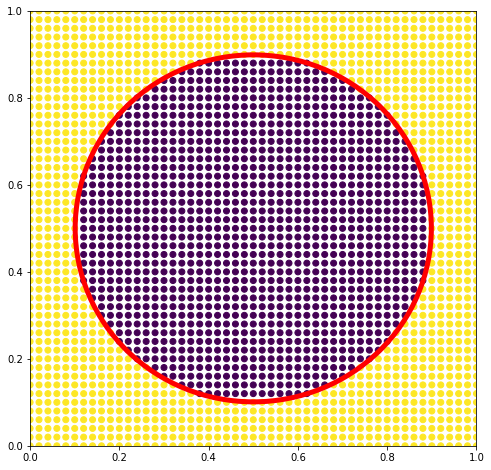

In [5]:
plot_data(points, labels)
np.unique(labels.numpy())

### Test with Categorical Crossentropy

In [6]:
x_all, y_all = generate_data(num_of_points=500)
y_all = label2one_hot(y_all, val=0)  # convert labels to 1-hot encoding

print("x_all.shape: {} -- y_all.shape: {}".format(x_all.shape, y_all.shape))

x_all.shape: torch.Size([500, 2]) -- y_all.shape: torch.Size([500, 2])


In [8]:
model = default_net_1(x_all, y_all, num_of_epochs=2000)

Added Module Name: 0_Linear 
Added Module Name: 1_ReLU 
Added Module Name: 2_Linear 
Added Module Name: 3_ReLU 
Added Module Name: 4_Linear 
Added Module Name: 5_ReLU 
Added Module Name: 6_Dropout 
Added Module Name: 7_Linear 
Added Module Name: 8_Softmax 
x_train.shape: torch.Size([400, 2]) -- y_train.shape: torch.Size([400, 2])
x_val.shape: torch.Size([100, 2]) -- y_val.shape: torch.Size([100, 2])
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6935804486274719
key: train_acc -- value: 0.4975000023841858
key: val_loss -- value: 0.6945328712463379
key: val_acc -- value: 0.47999998927116394
epoch: 0 ---> train_loss: 0.6936, train_acc: 0.4975000023841858 ----- val_loss: 0.6945, val_acc: 0.47999998927116394
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2]

key: val_loss -- value: 0.6927263140678406
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6928871273994446
key: train_acc -- value: 0.5975000262260437
key: val_loss -- value: 0.6926969289779663
key: val_acc -- value: 0.6100000143051147
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6928825974464417
key: train_acc -- value: 0.5924999713897705
key: val_loss -- value: 0.6926841735839844
key: val_acc -- value: 0.6000000238418579
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.69287908

torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6927833557128906
key: train_acc -- value: 0.5149999856948853
key: val_loss -- value: 0.6924549341201782
key: val_acc -- value: 0.5299999713897705
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6927797198295593
key: train_acc -- value: 0.5149999856948853
key: val_loss -- value: 0.6924492120742798
key: val_acc -- value: 0.5299999713897705
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6927753686904907
key: train_acc -- value: 0.5249999761581421
key: val_loss -- value: 0.6924507021903992
key: val_acc -- value: 0.

key: train_loss -- value: 0.6926677227020264
key: train_acc -- value: 0.5525000095367432
key: val_loss -- value: 0.6923208832740784
key: val_acc -- value: 0.550000011920929
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6926631927490234
key: train_acc -- value: 0.5400000214576721
key: val_loss -- value: 0.6923058032989502
key: val_acc -- value: 0.550000011920929
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6926582455635071
key: train_acc -- value: 0.5575000047683716
key: val_loss -- value: 0.6923123002052307
key: val_acc -- value: 0.550000011920929
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2

key: val_acc -- value: 0.6299999952316284
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6925552487373352
key: train_acc -- value: 0.6050000190734863
key: val_loss -- value: 0.6922469139099121
key: val_acc -- value: 0.6399999856948853
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6925492882728577
key: train_acc -- value: 0.5849999785423279
key: val_loss -- value: 0.6922124624252319
key: val_acc -- value: 0.6000000238418579
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6925448775291443
key: train_acc -- value: 0.5799999

torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6924601793289185
key: train_acc -- value: 0.6050000190734863
key: val_loss -- value: 0.692107081413269
key: val_acc -- value: 0.6299999952316284
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6924553513526917
key: train_acc -- value: 0.6050000190734863
key: val_loss -- value: 0.6920996308326721
key: val_acc -- value: 0.6299999952316284
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6924517154693604
key: train_acc -- value: 0.6025000214576721
key: val_loss -- value: 0.6921024322509766
key: val_acc -- value: 0.6299999952316284
row_sum: (400,) -- row_sum_sum:

key: train_loss -- value: 0.6923767328262329
key: train_acc -- value: 0.5950000286102295
key: val_loss -- value: 0.6920891404151917
key: val_acc -- value: 0.6100000143051147
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6923730969429016
key: train_acc -- value: 0.5924999713897705
key: val_loss -- value: 0.6920888423919678
key: val_acc -- value: 0.6200000047683716
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6923694014549255
key: train_acc -- value: 0.6075000166893005
key: val_loss -- value: 0.6920631527900696
key: val_acc -- value: 0.6200000047683716
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400

key: val_loss -- value: 0.6919313669204712
key: val_acc -- value: 0.6299999952316284
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6922906637191772
key: train_acc -- value: 0.6100000143051147
key: val_loss -- value: 0.6919476389884949
key: val_acc -- value: 0.6200000047683716
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6922869086265564
key: train_acc -- value: 0.6075000166893005
key: val_loss -- value: 0.6919448375701904
key: val_acc -- value: 0.6200000047683716
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.69228327

torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6922051310539246
key: train_acc -- value: 0.5874999761581421
key: val_loss -- value: 0.6918783783912659
key: val_acc -- value: 0.6200000047683716
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6922010183334351
key: train_acc -- value: 0.5950000286102295
key: val_loss -- value: 0.691861093044281
key: val_acc -- value: 0.6100000143051147
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.692196249961853
key: train_acc -- value: 0.6000000238418579
key: val_loss -- value: 0.691849946975708
key: val_acc -- value: 0.610

torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6921098828315735
key: train_acc -- value: 0.6000000238418579
key: val_loss -- value: 0.6917323470115662
key: val_acc -- value: 0.6100000143051147
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.692105233669281
key: train_acc -- value: 0.5849999785423279
key: val_loss -- value: 0.6917455792427063
key: val_acc -- value: 0.6200000047683716
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6921030282974243
key: train_acc -- value: 0.5799999833106995
key: val_loss -- value: 0.691775918006897
key: val_acc -- value: 0.62

torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6920115947723389
key: train_acc -- value: 0.6025000214576721
key: val_loss -- value: 0.6915857791900635
key: val_acc -- value: 0.6100000143051147
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6920077800750732
key: train_acc -- value: 0.6025000214576721
key: val_loss -- value: 0.6915752291679382
key: val_acc -- value: 0.6100000143051147
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6920005083084106
key: train_acc -- value: 0.5899999737739563
key: val_loss -- value: 0.6915928721427917
key: val_acc -- value: 0.6200000047683716
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400

torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6917577385902405
key: train_acc -- value: 0.5824999809265137
key: val_loss -- value: 0.6913018822669983
key: val_acc -- value: 0.6200000047683716
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6917515397071838
key: train_acc -- value: 0.5824999809265137
key: val_loss -- value: 0.6913161277770996
key: val_acc -- value: 0.6200000047683716
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6917459964752197
key: train_acc -- value: 0.5799999833106995
key: val_loss -- value: 0.691294252872467
key: val_acc -- value: 0.6200000047683716
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400,

key: train_acc -- value: 0.5699999928474426
key: val_loss -- value: 0.691193163394928
key: val_acc -- value: 0.5799999833106995
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6916132569313049
key: train_acc -- value: 0.574999988079071
key: val_loss -- value: 0.6911628246307373
key: val_acc -- value: 0.6100000143051147
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6916053891181946
key: train_acc -- value: 0.574999988079071
key: val_loss -- value: 0.6911539435386658
key: val_acc -- value: 0.6100000143051147
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100,

key: train_acc -- value: 0.5774999856948853
key: val_loss -- value: 0.69093918800354
key: val_acc -- value: 0.6000000238418579
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6913740634918213
key: train_acc -- value: 0.5774999856948853
key: val_loss -- value: 0.6909334063529968
key: val_acc -- value: 0.6000000238418579
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6913682818412781
key: train_acc -- value: 0.5799999833106995
key: val_loss -- value: 0.6909393072128296
key: val_acc -- value: 0.5899999737739563
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100

key: val_acc -- value: 0.6100000143051147
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6911855936050415
key: train_acc -- value: 0.5699999928474426
key: val_loss -- value: 0.6906533241271973
key: val_acc -- value: 0.5799999833106995
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6911770701408386
key: train_acc -- value: 0.5699999928474426
key: val_loss -- value: 0.6906446814537048
key: val_acc -- value: 0.5799999833106995
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6911695003509521
key: train_acc -- value: 0.5724999

torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6909772753715515
key: train_acc -- value: 0.5799999833106995
key: val_loss -- value: 0.6904712915420532
key: val_acc -- value: 0.5899999737739563
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.690967857837677
key: train_acc -- value: 0.5874999761581421
key: val_loss -- value: 0.6904732584953308
key: val_acc -- value: 0.6000000238418579
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6909571886062622
key: train_acc -- value: 0.5799999833106995
key: val_loss -- value: 0.6904443502426147
key: val_acc -- value: 0.5899999737739563
row_sum: (400,) -- row_sum_sum:

torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6907326579093933
key: train_acc -- value: 0.5774999856948853
key: val_loss -- value: 0.6901103258132935
key: val_acc -- value: 0.5899999737739563
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6907209157943726
key: train_acc -- value: 0.5849999785423279
key: val_loss -- value: 0.690123975276947
key: val_acc -- value: 0.5899999737739563
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6907081007957458
key: train_acc -- value: 0.5849999785423279
key: val_loss -- value: 0.6901168823242188
key: val_acc -- value: 0.6000000238418579
row_sum: (400,) -- row_sum_sum:

key: train_loss -- value: 0.6904764771461487
key: train_acc -- value: 0.5824999809265137
key: val_loss -- value: 0.689866304397583
key: val_acc -- value: 0.5899999737739563
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6904633045196533
key: train_acc -- value: 0.5824999809265137
key: val_loss -- value: 0.6898677349090576
key: val_acc -- value: 0.6000000238418579
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6904543042182922
key: train_acc -- value: 0.5824999809265137
key: val_loss -- value: 0.6898598670959473
key: val_acc -- value: 0.6000000238418579
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400,

key: val_loss -- value: 0.6892437934875488
key: val_acc -- value: 0.6000000238418579
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6899046301841736
key: train_acc -- value: 0.5849999785423279
key: val_loss -- value: 0.6892116665840149
key: val_acc -- value: 0.6000000238418579
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6898966431617737
key: train_acc -- value: 0.5874999761581421
key: val_loss -- value: 0.689238429069519
key: val_acc -- value: 0.6000000238418579
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.689878523

torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6895231604576111
key: train_acc -- value: 0.5899999737739563
key: val_loss -- value: 0.688687264919281
key: val_acc -- value: 0.5899999737739563
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6895037293434143
key: train_acc -- value: 0.5899999737739563
key: val_loss -- value: 0.6886538863182068
key: val_acc -- value: 0.5899999737739563
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.689486026763916
key: train_acc -- value: 0.5874999761581421
key: val_loss -- value: 0.6886168122291565
key: val_acc -- value: 0.58

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6885623335838318
key: train_acc -- value: 0.5824999809265137
key: val_loss -- value: 0.6876160502433777
key: val_acc -- value: 0.6000000238418579
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6885368227958679
key: train_acc -- value: 0.5824999809265137
key: val_loss -- value: 0.6875655651092529
key: val_acc -- value: 0.6000000238418579
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6885128617286682
key: train_acc -- value: 0.5874999761581421
key: val_loss -- value: 0.687569

torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6878650784492493
key: train_acc -- value: 0.5874999761581421
key: val_loss -- value: 0.6868433356285095
key: val_acc -- value: 0.6000000238418579
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6878349184989929
key: train_acc -- value: 0.5924999713897705
key: val_loss -- value: 0.6868043541908264
key: val_acc -- value: 0.6100000143051147
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6877979040145874
key: train_acc -- value: 0.5874999761581421
key: val_loss -- value: 0.6867309808731079
key: val_acc -- value: 0.6000000238418579
row_sum: (400,) -- row_sum_sum

torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.686733603477478
key: train_acc -- value: 0.5874999761581421
key: val_loss -- value: 0.6856346726417542
key: val_acc -- value: 0.6100000143051147
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6866875290870667
key: train_acc -- value: 0.5874999761581421
key: val_loss -- value: 0.6855694651603699
key: val_acc -- value: 0.6100000143051147
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6866455674171448
key: train_acc -- value: 0.5874999761581421
key: val_loss -- value: 0.6855435967445374
key: val_acc -- value: 0.6100000143051147
row_sum: (400,) -- row_sum_sum:

torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6843204498291016
key: train_acc -- value: 0.5899999737739563
key: val_loss -- value: 0.6831054091453552
key: val_acc -- value: 0.6000000238418579
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.684245228767395
key: train_acc -- value: 0.5899999737739563
key: val_loss -- value: 0.6829771995544434
key: val_acc -- value: 0.6100000143051147
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6841765642166138
key: train_acc -- value: 0.5899999737739563
key: val_loss -- value: 0.6828870177268982
key: val_acc -- value: 0.6

torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6828064918518066
key: train_acc -- value: 0.5950000286102295
key: val_loss -- value: 0.6813164353370667
key: val_acc -- value: 0.6100000143051147
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6827369928359985
key: train_acc -- value: 0.5924999713897705
key: val_loss -- value: 0.6812125444412231
key: val_acc -- value: 0.6100000143051147
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6826640963554382
key: train_acc -- value: 0.5874999761581421
key: val_loss -- value: 0.6811180114746094
key: val_acc -- value: 0.6000000238418579
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400

key: train_loss -- value: 0.6785578727722168
key: train_acc -- value: 0.6000000238418579
key: val_loss -- value: 0.6770448088645935
key: val_acc -- value: 0.6100000143051147
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6784462928771973
key: train_acc -- value: 0.6000000238418579
key: val_loss -- value: 0.6768751740455627
key: val_acc -- value: 0.6100000143051147
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6783173084259033
key: train_acc -- value: 0.5924999713897705
key: val_loss -- value: 0.6765798926353455
key: val_acc -- value: 0.6000000238418579
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400

key: val_loss -- value: 0.6738643050193787
key: val_acc -- value: 0.5899999737739563
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6715864539146423
key: train_acc -- value: 0.6000000238418579
key: val_loss -- value: 0.6695106625556946
key: val_acc -- value: 0.5899999737739563
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6713917255401611
key: train_acc -- value: 0.6050000190734863
key: val_loss -- value: 0.669526219367981
key: val_acc -- value: 0.6000000238418579
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 

key: val_loss -- value: 0.6655403971672058
key: val_acc -- value: 0.6000000238418579
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6668218970298767
key: train_acc -- value: 0.612500011920929
key: val_loss -- value: 0.6652055382728577
key: val_acc -- value: 0.6000000238418579
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.666584312915802
key: train_acc -- value: 0.6150000095367432
key: val_loss -- value: 0.6650184392929077
key: val_acc -- value: 0.6000000238418579
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6663467288

torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.651421070098877
key: train_acc -- value: 0.6700000166893005
key: val_loss -- value: 0.6497183442115784
key: val_acc -- value: 0.6700000166893005
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6509845852851868
key: train_acc -- value: 0.675000011920929
key: val_loss -- value: 0.6495266556739807
key: val_acc -- value: 0.6899999976158142
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6505334377288818
key: train_acc -- value: 0.6775000095367432
key: val_loss -- value: 0.6491317749023438
key: val_acc -- value: 0.6899999976158142
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 

key: val_loss -- value: 0.6360836625099182
key: val_acc -- value: 0.7099999785423279
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6371749639511108
key: train_acc -- value: 0.7024999856948853
key: val_loss -- value: 0.6352342963218689
key: val_acc -- value: 0.7099999785423279
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.636337399482727

key: val_loss -- value: 0.6125979423522949
key: val_acc -- value: 0.7300000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6152182221412659
key: train_acc -- value: 0.74500000

torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5867293477058411
key: train_acc -- value: 0.7925000190734863
key: val_loss -- value: 0.581030547618866
key: val_acc -- value: 0.7900000214576721
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5851045846939087
key: train_acc -- value: 0.7850000262260437
key: val_loss -- value: 0.5791874527931213
key: val_acc -- value: 0.7699999809265137
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5834377408027649
key: train_acc -- value: 0.7875000238418579
key: val_loss -- value: 0.5771540403366089
key: val_acc -- value: 0.7699999809265137
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400,

torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5612987279891968
key: train_acc -- value: 0.6725000143051147
key: val_loss -- value: 0.5498738288879395
key: val_acc -- value: 0.699999988079071
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5598074197769165
key: train_acc -- value: 0.6299999952316284
key: val_loss -- value: 0.5238716006278992
key: val_acc -- value: 0.6899999976158142
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5679779648780823
key: train_acc -- value: 0.6474999785423279
key: val_loss -- value: 0.5568676590919495
key: val_acc -- value: 0.6899999976158142
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400,

key: val_loss -- value: 0.5118293166160583
key: val_acc -- value: 0.6399999856948853
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5513710379600525
key: train_acc -- value: 0.6625000238418579
key: val_loss -- value: 0.5349173545837402
key: val_acc -- value: 0.699999988079071
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5518491864204407
key: train_acc -- value: 0.6324999928474426
key: val_loss -- value: 0.5133355855941772
key: val_acc -- value: 0.6399999856948853
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.529656052

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.4790957570075989
key: train_acc -- value: 0.699999988079071
key: val_loss -- value: 0.4449329674243927
key: val_acc -- value: 0.6899999976158142
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.46794337034225464
key: train_acc -- value: 0.7250000238418579
key: val_loss -- value: 0.44154810905456543
key: val_acc -- value: 0.7799999713897705
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.4562997817993164
key: train_acc -- value: 0.7149999737739563
key: val_loss -- value: 0.42265

torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.4403904974460602
key: train_acc -- value: 0.737500011920929
key: val_loss -- value: 0.4110296666622162
key: val_acc -- value: 0.7799999713897705
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.425901859998703
key: train_acc -- value: 0.7275000214576721
key: val_loss -- value: 0.400431364774704
key: val_acc -- value: 0.7400000095367432
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.4351057708263397
key: train_acc -- value: 0.7350000143051147
key: val_loss -- value: 0.40765219926834106
key: val_acc -- value: 0.7900000214576721
row_sum: (400,) -- row_sum_sum: 

key: train_loss -- value: 0.386152982711792
key: train_acc -- value: 0.7674999833106995
key: val_loss -- value: 0.364207923412323
key: val_acc -- value: 0.7599999904632568
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.4074459373950958
key: train_acc -- value: 0.75
key: val_loss -- value: 0.3798595070838928
key: val_acc -- value: 0.8100000023841858
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.39922305941581726
key: train_acc -- value: 0.7574999928474426
key: val_loss -- value: 0.3805026710033417
key: val_acc -- value: 0.7599999904632568
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Siz

torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.3589123785495758
key: train_acc -- value: 0.7925000190734863
key: val_loss -- value: 0.3381384313106537
key: val_acc -- value: 0.8199999928474426
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.33307304978370667
key: train_acc -- value: 0.8174999952316284
key: val_loss -- value: 0.31554922461509705
key: val_acc -- value: 0.8199999928474426
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.36128273606300354
key: train_acc -- value: 0.7825000286102295
key: val_loss -- value: 0.337041974067688
key: val_acc -- value: 

torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2887439429759979
key: train_acc -- value: 0.8550000190734863
key: val_loss -- value: 0.279163122177124
key: val_acc -- value: 0.8399999737739563
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.3038996756076813
key: train_acc -- value: 0.8374999761581421
key: val_loss -- value: 0.2908390462398529
key: val_acc -- value: 0.8100000023841858
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.3409630060195923
key: train_acc -- value: 0.8125
key: val_loss -- value: 0.3252454102039337
key: val_acc -- value: 0.8299999833106995
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.S

key: val_loss -- value: 0.23166504502296448
key: val_acc -- value: 0.8999999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.25059667229652405
key: train_acc -- value: 0.8774999976158142
key: val_loss -- value: 0.24583327770233154
key: val_acc -- value: 0.8600000143051147
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.23374930024147034
key: train_acc -- value: 0.8824999928474426
key: val_loss -- value: 0.22241553664207458
key: val_acc -- value: 0.9200000166893005
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.232

torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.24709662795066833
key: train_acc -- value: 0.875
key: val_loss -- value: 0.25034451484680176
key: val_acc -- value: 0.8600000143051147
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.24277521669864655
key: train_acc -- value: 0.8774999976158142
key: val_loss -- value: 0.23327024281024933
key: val_acc -- value: 0.8999999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2785171866416931
key: train_acc -- value: 0.8550000190734863
key: val_loss -- value: 0.27696993947029114
key: val_acc -- value: 0.8500000238418579
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
to

torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.17867735028266907
key: train_acc -- value: 0.9175000190734863
key: val_loss -- value: 0.17361578345298767
key: val_acc -- value: 0.949999988079071
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.1881849318742752
key: train_acc -- value: 0.9175000190734863
key: val_loss -- value: 0.19831344485282898
key: val_acc -- value: 0.8899999856948853
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.21004360914230347
key: train_acc -- value: 0.8849999904632568
key: val_loss -- value: 0.20235969126224518
key: val_acc -- value: 0.9200000166893005
row_sum: (400,) -- row_sum

key: train_loss -- value: 0.2066323161125183
key: train_acc -- value: 0.8949999809265137
key: val_loss -- value: 0.21438178420066833
key: val_acc -- value: 0.8799999952316284
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.18748126924037933
key: train_acc -- value: 0.9100000262260437
key: val_loss -- value: 0.1803484410047531
key: val_acc -- value: 0.9399999976158142
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.19341623783111572
key: train_acc -- value: 0.9075000286102295
key: val_loss -- value: 0.205198273062706
key: val_acc -- value: 0.8799999952316284
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([4

key: train_acc -- value: 0.8675000071525574
key: val_loss -- value: 0.23405230045318604
key: val_acc -- value: 0.8899999856948853
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2721099257469177
key: train_acc -- value: 0.8650000095367432
key: val_loss -- value: 0.28393733501434326
key: val_acc -- value: 0.8600000143051147
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.21349510550498962
key: train_acc -- value: 0.8899999856948853
key: val_loss -- value: 0.20830373466014862
key: val_acc -- value: 0.9100000262260437
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Siz

key: val_loss -- value: 0.1802131086587906
key: val_acc -- value: 0.9300000071525574
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.21442493796348572
key: train_acc -- value: 0.8949999809265137
key: val_loss -- value: 0.24152864515781403
key: val_acc -- value: 0.8600000143051147
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.17754890024662018
key: train_acc -- value: 0.9150000214576721
key: val_loss -- value: 0.17105354368686676
key: val_acc -- value: 0.9300000071525574
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2044

key: train_acc -- value: 0.8949999809265137
key: val_loss -- value: 0.24495910108089447
key: val_acc -- value: 0.8600000143051147
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.18009112775325775
key: train_acc -- value: 0.9100000262260437
key: val_loss -- value: 0.17805176973342896
key: val_acc -- value: 0.9300000071525574
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.230869859457016
key: train_acc -- value: 0.887499988079071
key: val_loss -- value: 0.25979548692703247
key: val_acc -- value: 0.8600000143051147
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size(

key: val_acc -- value: 0.8500000238418579
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.26306164264678955
key: train_acc -- value: 0.8675000071525574
key: val_loss -- value: 0.2581842243671417
key: val_acc -- value: 0.8600000143051147
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.3389742970466614
key: train_acc -- value: 0.8500000238418579
key: val_loss -- value: 0.38435113430023193
key: val_acc -- value: 0.8500000238418579
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.24907536804676056
key: train_acc -- value: 0.8774

key: val_acc -- value: 0.8600000143051147
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.20346908271312714
key: train_acc -- value: 0.9100000262260437
key: val_loss -- value: 0.19888851046562195
key: val_acc -- value: 0.9200000166893005
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.23049479722976685
key: train_acc -- value: 0.8949999809265137
key: val_loss -- value: 0.2738218605518341
key: val_acc -- value: 0.8600000143051147
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.16638435423374176
key: train_acc -- value: 0.917

torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.1363503634929657
key: train_acc -- value: 0.9300000071525574
key: val_loss -- value: 0.17171047627925873
key: val_acc -- value: 0.8799999952316284
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.1352052390575409
key: train_acc -- value: 0.9350000023841858
key: val_loss -- value: 0.1374056041240692
key: val_acc -- value: 0.9399999976158142
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.1303093433380127
key: train_acc -- value: 0.9325000047683716
key: val_loss -- value: 0.16508659720420837
key: val_acc -- value: 

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.06107836589217186
key: train_acc -- value: 0.9925000071525574
key: val_loss -- value: 0.08258210122585297
key: val_acc -- value: 0.9900000095367432
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.05975451320409775
key: train_acc -- value: 0.987500011920929
key: val_loss -- value: 0.07256428152322769
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.060756608843803406
key: train_acc -- value: 0.9925000071525574
key: val_loss -- value: 0.0

torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.07553316652774811
key: train_acc -- value: 0.9700000286102295
key: val_loss -- value: 0.0796816274523735
key: train_acc -- value: 0.9150000214576721
key: val_loss -- value: 0.2054292857646942
key: val_acc -- value: 0.8799999952316284
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.13847191631793976
key: train_acc -- value: 0.9275000095367432
key: val_loss -- value: 0.14285391569137573
key: val_acc -- value: 0.9399999976158142
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.13547974824905396
key: train_acc -- val

torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.07438479363918304
key: train_acc -- value: 0.9725000262260437
key: val_loss -- value: 0.08257129043340683
key: val_acc -- value: 0.9700000286102295
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.07327431440353394
key: train_acc -- value: 0.9700000286102295
key: val_loss -- value: 0.09861378371715546
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.07376973330974579
key: train_acc -- value: 0.9775000214576721
key: val_loss -- value: 0.08137497305870056
key: val_acc -- val

torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.1146196648478508
key: train_acc -- value: 0.9375
key: val_loss -- value: 0.15315976738929749
key: val_acc -- value: 0.9200000166893005
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.10476034879684448
key: train_acc -- value: 0.9474999904632568
key: val_loss -- value: 0.1119132936000824
key: val_acc -- value: 0.9399999976158142
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.11267609894275665
key: train_acc -- value: 0.9375
key: val_loss -- value: 0.15092381834983826
key: val_acc -- value: 0.9200000166893005
row

torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.12553508579730988
key: train_acc -- value: 0.9350000023841858
key: val_loss -- value: 0.13072791695594788
key: val_acc -- value: 0.9399999976158142
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.12810112535953522
key: train_acc -- value: 0.9350000023841858
key: val_loss -- value: 0.16813379526138306
key: val_acc -- value: 0.8999999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.09459308534860611
key: train_acc -- value: 0.9574999809265137key: val_loss -- value: 0.07345490157604218
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size

key: train_loss -- value: 0.06005902215838432
key: train_acc -- value: 0.9775000214576721
key: val_loss -- value: 0.088162362575531
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.05389080196619034
key: train_acc -- value: 0.987500011920929
key: val_loss -- value: 0.06775476038455963
key: val_acc -- value: 0.9700000286102295
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.05016341805458069
key: train_acc -- value: 0.9925000071525574
key: val_loss -- value: 0.07743306457996368
key: val_acc -- value: 0.9900000095367432
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([

torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.0645517110824585
key: train_acc -- value: 0.9725000262260437
key: val_loss -- value: 0.09086836874485016
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.06899303197860718
key: train_acc -- value: 0.9725000262260437
key: val_loss -- value: 0.08398096263408661
key: val_acc -- value: 0.9599999785423279
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.059385351836681366
key: train_acc -- value: 0.9750000238418579
key: val_loss -- value: 0.08617287874221802
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Siz

torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.04584242030978203
key: train_acc -- value: 0.987500011920929
key: val_loss -- value: 0.06778284907341003
key: val_acc -- value: 0.9700000286102295
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.04446236789226532
key: train_acc -- value: 0.9925000071525574
key: val_loss -- value: 0.07105819135904312
key: val_acc -- value: 0.9900000095367432
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.04382851719856262
key: train_acc -- value: 0.9925000071525574
key: val_loss -- value: 0.06772149354219437
key: val_acc -- value: 0.9700000286102295
row_sum: (400,) -- row_su

torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.042307209223508835
key: train_acc -- value: 0.9900000095367432
key: val_loss -- value: 0.06504960358142853
key: val_acc -- value: 0.9700000286102295
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.042175840586423874
key: train_acc -- value: 0.9925000071525574
key: val_loss -- value: 0.0712156593799591
key: val_acc -- value: 0.9900000095367432
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.04192526265978813
key: train_acc -- value: 0.9900000095367432
key: val_loss -- value: 0.06528422236442566
key: val_acc -- va

torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.07961367815732956
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.08161918818950653
key: val_acc -- value: 0.9599999785423279
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.09894359856843948
key: train_acc -- value: 0.949999988079071
key: val_loss -- value: 0.13499078154563904
key: val_acc -- value: 0.9300000071525574
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.09580432623624802
key: train_acc -- value: 0.9524999856948853
key: val_loss -- value: 0.10457975417375565
key: val_acc -- value: 0.9599999785423279
row_sum: (400,) -- row_su

key: train_loss -- value: 0.09935988485813141
key: train_acc -- value: 0.9449999928474426
key: val_loss -- value: 0.13234174251556396
key: val_acc -- value: 0.9399999976158142
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.09157034754753113
key: train_acc -- value: 0.9549999833106995
key: val_loss -- value: 0.1105586513876915
key: val_acc -- value: 0.949999988079071
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.08218952268362045
key: train_acc -- value: 0.9624999761581421
key: val_loss -- value: 0.11523440480232239
key: val_acc -- value: 0.949999988079071
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([

torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.048549577593803406
key: train_acc -- value: 0.9800000190734863
key: val_loss -- value: 0.06949546188116074
key: val_acc -- value: 0.9700000286102295
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.05377018451690674
key: train_acc -- value: 0.9750000238418579
key: val_loss -- value: 0.08480343222618103
key: val_acc -- value: 0.9700000286102295
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.055947817862033844
key: train_acc -- value: 0.9750000238418579
key: val_loss -- value: 0.06995277106761932
key: val_acc -- v

In [9]:
x_test, y_test = generate_grid_data(minn=0, maxx=1, num_of_points_per_dim=51)
test_acc, test_loss, y_pred = model.evaluate(x_test, label2one_hot(y_test, val=0), return_pred=True)
test_acc, test_loss

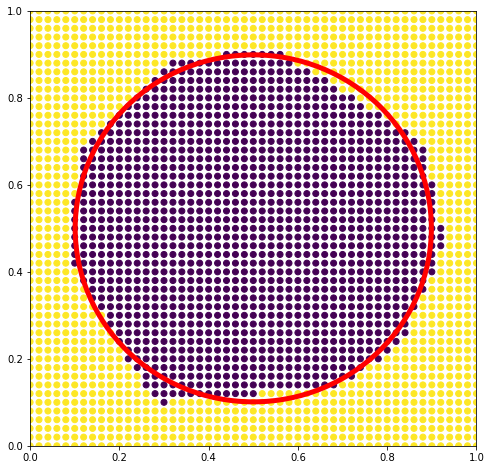

In [10]:
print(x_test.shape, " -- ", y_pred.shape)
plot_data(x_test, y_pred)

In [11]:
model.print_to_disk("model1.json")

In [12]:
model_loaded = Sequential()
model_loaded.load_from_disk("model1.json")

Added Module Name: 0_Linear 
Added Module Name: 1_ReLU 
Added Module Name: 2_Linear 
Added Module Name: 3_ReLU 
Added Module Name: 4_Linear 
Added Module Name: 5_ReLU 
Added Module Name: 6_Dropout 
Added Module Name: 7_Linear 
Added Module Name: 8_Softmax 


In [13]:
model_loaded.params

<generator object params at 0x000002AB815F9308>

In [14]:
test_acc, test_loss, y_pred = model.evaluate(x_test, label2one_hot(y_test, val=0), return_pred=True)

torch.Size([2601, 2])  --  torch.Size([2601, 2])


In [15]:
test_acc, test_loss, y_pred

(tensor(0.9635), 0.08028058707714081, tensor([ 1,  1,  1,  ...,  1,  1,  1]))

In [16]:
test_acc_, test_loss_, y_pred_ = model_loaded.evaluate(x_test, label2one_hot(y_test, val=0), return_pred=True)

torch.Size([2601, 2])  --  torch.Size([2601, 2])


In [17]:
test_acc_, test_loss_, y_pred_

(tensor(0.9635), 0.08028058707714081, tensor([ 1,  1,  1,  ...,  1,  1,  1]))

In [18]:
model.print_to_disk("sada", is_save_to_disk=False)

OrderedDict([('0_Linear',
              OrderedDict([('weight',
                            [[0.05102531611919403,
                              -0.10346686840057373,
                              0.11930970102548599,
                              -0.6353585124015808,
                              2.5770227909088135,
                              -0.13900986313819885,
                              -0.09444878995418549,
                              -0.17902739346027374,
                              0.04677068069577217,
                              -0.038193605840206146,
                              -0.14679692685604095,
                              0.13148094713687897,
                              -0.10496930778026581,
                              -0.09082763642072678,
                              -3.022216320037842,
                              -0.42626646161079407,
                              1.0925298929214478,
                              -0.01911160536110401,
          

In [19]:
model_loaded.print_to_disk("sada", is_save_to_disk=False)

OrderedDict([('0_Linear',
              OrderedDict([('weight',
                            [[0.05102531611919403,
                              -0.10346686840057373,
                              0.11930970102548599,
                              -0.6353585124015808,
                              2.5770227909088135,
                              -0.13900986313819885,
                              -0.09444878995418549,
                              -0.17902739346027374,
                              0.04677068069577217,
                              -0.038193605840206146,
                              -0.14679692685604095,
                              0.13148094713687897,
                              -0.10496930778026581,
                              -0.09082763642072678,
                              -3.022216320037842,
                              -0.42626646161079407,
                              1.0925298929214478,
                              -0.01911160536110401,
          